In [17]:
import numpy as np
import pandas as pd
import sys
import json
import os
import copy
import matplotlib.pyplot as plt
import scipy
import multiprocessing
import h5py
import corner
import dynesty
from tqdm import tqdm

Load save:

In [35]:
dsampler = dynesty.DynamicNestedSampler.restore('dynesty_saves/1999_01_14_restricted_heights.save')
dsampler2 = dynesty.DynamicNestedSampler.restore('dynesty_saves/1999_01_14_restricted_heights_constant_tau.save')
results = dsampler.results
results2 = dsampler2.results
samples = results.samples
samples2 = results2.samples
ndim = len(samples.T)
ndim2 = len(samples2.T)

Summary:

In [36]:
results.summary(), results2.summary()

Summary
niter: 22216
ncall: 2920664
eff(%):  0.689
logz: -25.830 +/-  0.128
Summary
niter: 23426
ncall: 3102681
eff(%):  0.688
logz: -31.399 +/-  0.138


(None, None)

In [37]:
# directory = './dynesty_saves'
# for filename in os.listdir(directory):
#     f = os.path.join(directory, filename)
#     if os.path.isfile(f):
#         dsamp = dynesty.DynamicNestedSampler.restore(f)
#         print(filename, dsamp.results.samples_n)

Samples:

In [38]:
samples[-1]

array([3.08851770e+06, 4.13207952e+00, 6.03366128e+01, 2.59471750e+01,
       3.95648826e+01, 9.99322192e+01, 9.11850870e-07, 4.40699149e-06,
       4.55074652e-06, 8.80975126e-07, 1.11281389e-02, 1.22266915e-04,
       4.51327649e-03, 1.96266767e-01, 1.30832902e-02, 7.51311439e-02,
       4.99290909e-01, 5.04938396e-02, 8.87290913e-01, 7.88360551e-02,
       8.15255123e+04, 6.39333387e+04, 4.82345637e+04, 3.94670136e+04,
       3.44209103e+04])

Text(0, 0.5, 'mass')

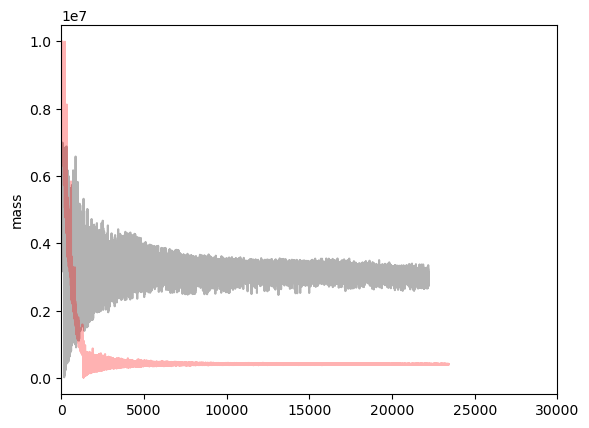

In [39]:
plt.plot(samples[:, 0], 'k', alpha=0.3)
plt.plot(samples2[:, 0], 'r', alpha=0.3)
plt.xlim(0., 30000.)
plt.ylabel('mass')

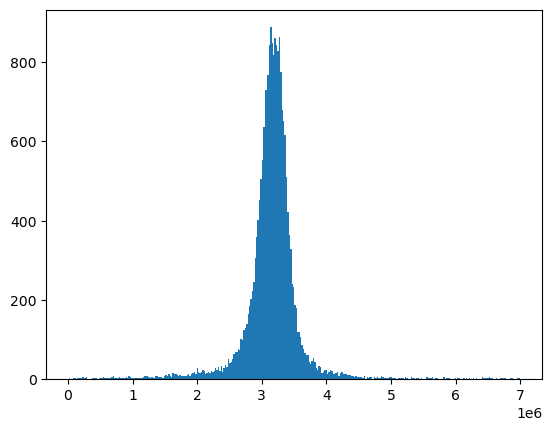

In [40]:
plt.hist(samples[:, 0].flatten(), bins='auto')
plt.show()

dyplots:

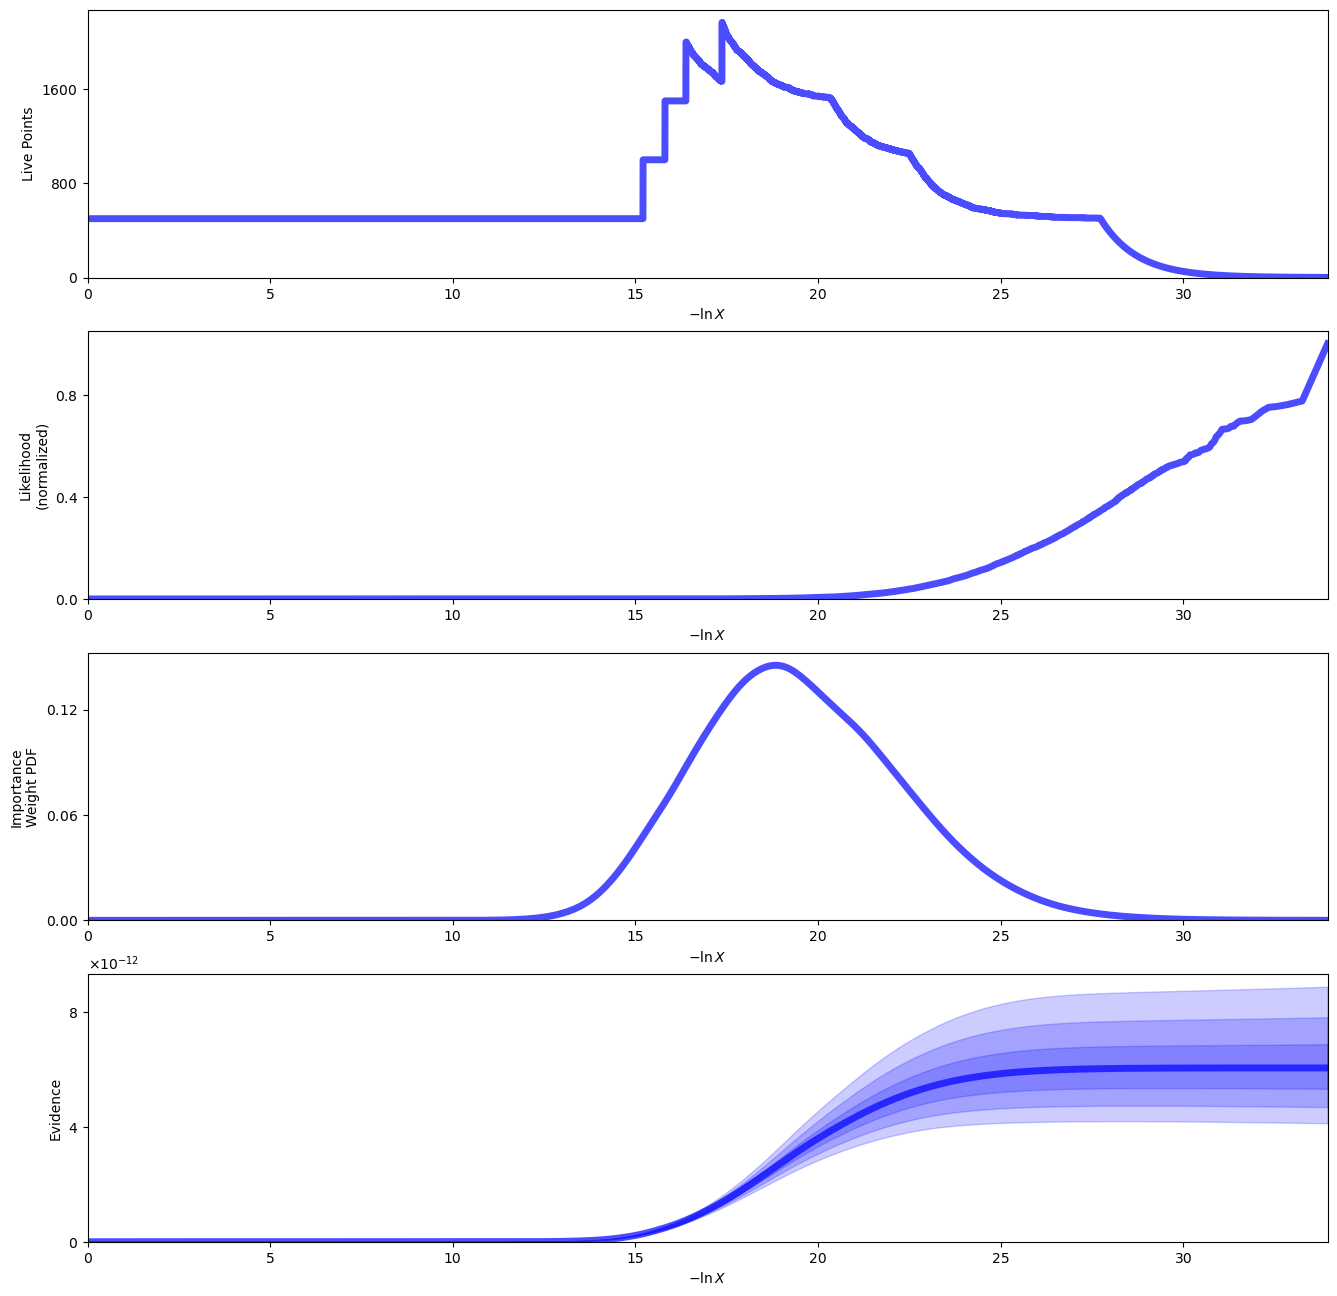

In [41]:
from dynesty import plotting as dyplot
fig, axes = dyplot.runplot(results)#, lnz_truth=lnz_truth)  # summary (run) plot

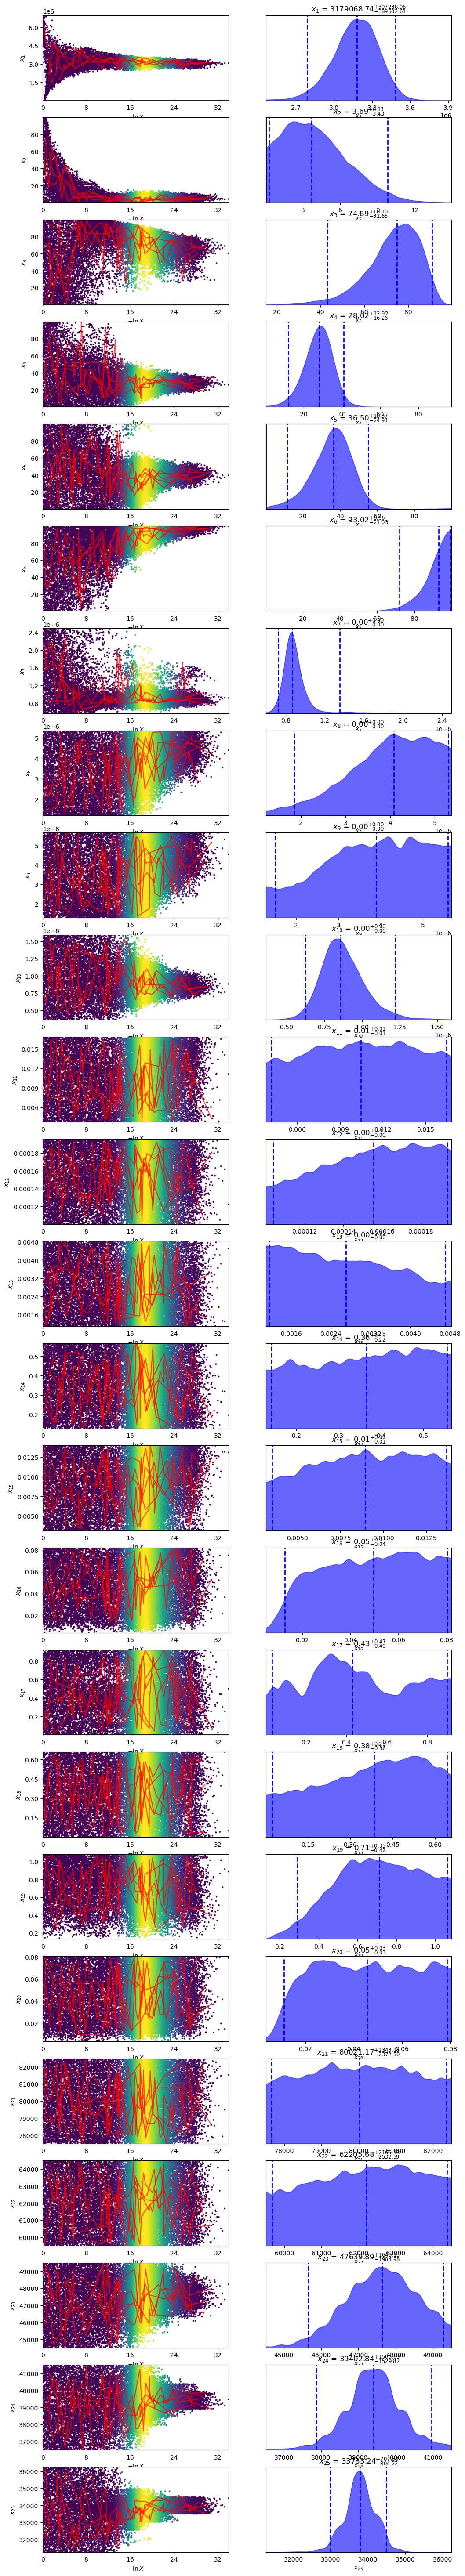

In [42]:
fig, axes = dyplot.traceplot(results, truths=np.zeros(ndim),
                             truth_color='black', show_titles=True,
                             trace_cmap='viridis', connect=True,
                             connect_highlight=range(5))

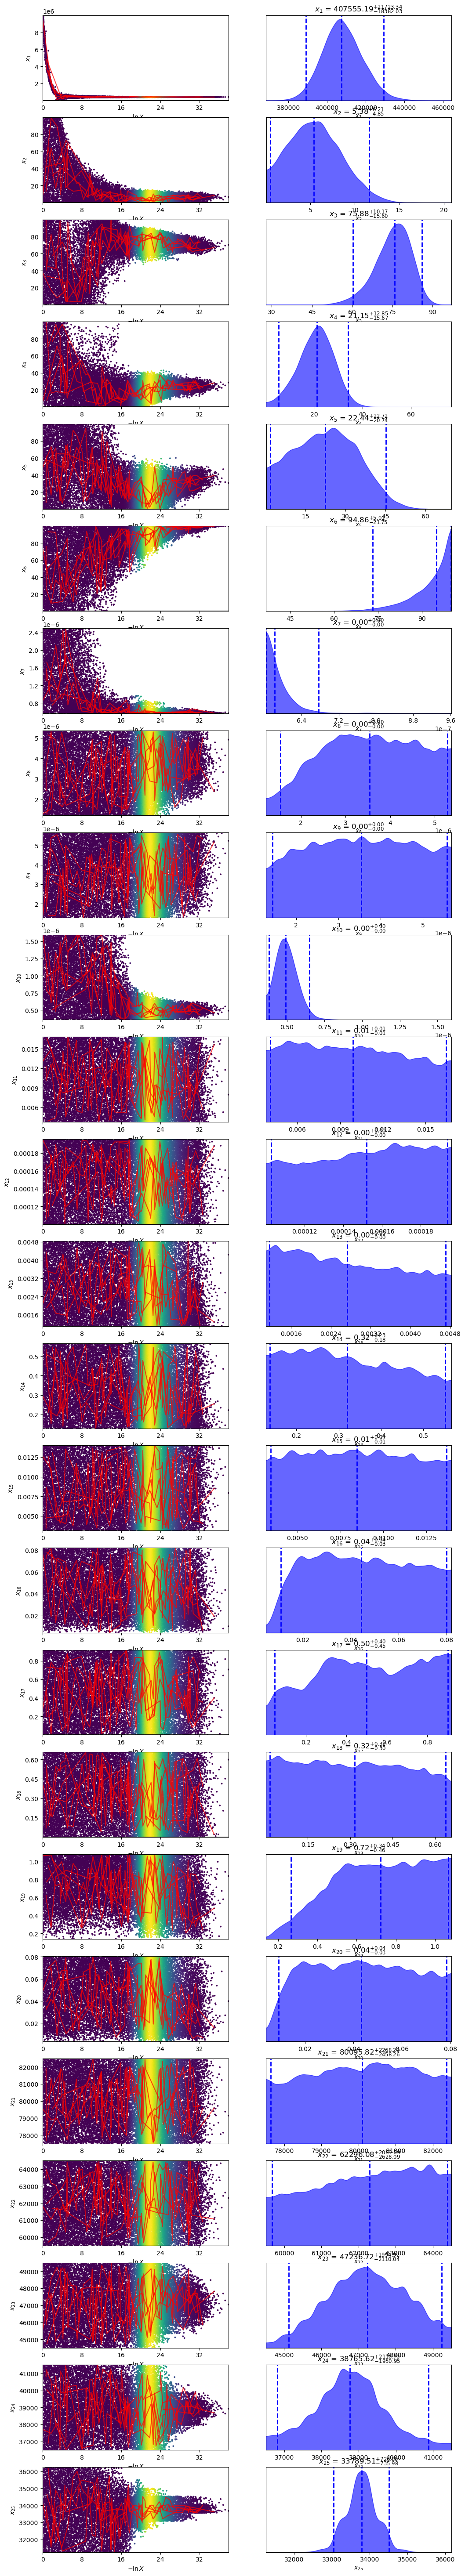

In [43]:
fig2, axes2 = dyplot.traceplot(results2, truths=np.zeros(ndim2),
                             truth_color='black', show_titles=True,
                             trace_cmap='viridis', connect=True,
                             connect_highlight=range(5))